User Overview analysis

In [42]:
import numpy as np
import pandas as pd
import math
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from cleaning_data import CleanTelco
from plotting import PlotDataFrame

In [43]:
#Initialize Plot helper
my_plt = PlotDataFrame()
#Load data
df_tele_clean = pd.read_csv("../data/cleaned_tele_data.csv")
df_tele_clean

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,-9223372036854775808,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,-9223372036854775808,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,208201909211140,33681854413,35794009006359,L77566A,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,-9223372036854775808,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,208200314458056,33760627129,35281510359387,D42335A,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,-9223372036854775808,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,208201402342131,33750343200,35356610164913,T21824A,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,-9223372036854775808,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,208201401415120,33699795932,35407009745539,D88865A,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,149991,7349883264234529792,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,208201716588303,33762146363,35860607430880,D10033B,...,57231077.0,295424923.0,915749.0,12036660.0,1730617.0,17269104.0,38337514.0,268231454.0,263493166.0,352656000.0
146883,149992,-9223372036854775808,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,208201402149148,33761274518,35327007109396,D78058B,...,45923464.0,70341448.0,1752716.0,7283344.0,954877.0,36814543.0,13742615.0,43581298.0,820617848.0,116264912.0
146884,149993,-9223372036854775808,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,208201402072093,33626114091,35735309473406,D73542B,...,43629118.0,623318363.0,2307959.0,12459876.0,2555578.0,26306531.0,40974659.0,571286842.0,179348636.0,666947481.0
146885,149994,-9223372036854775808,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,208200313074099,33645655643,35155409288696,T88383B,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0


Univariate Analysis

In [44]:
#Dur (ms)
df_tele_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468870e+05
mean,1.001894e+08
std,5.898822e+07
min,7.142988e+06
25%,5.852686e+07
50%,8.639999e+07
75%,1.331594e+08
max,2.451082e+08


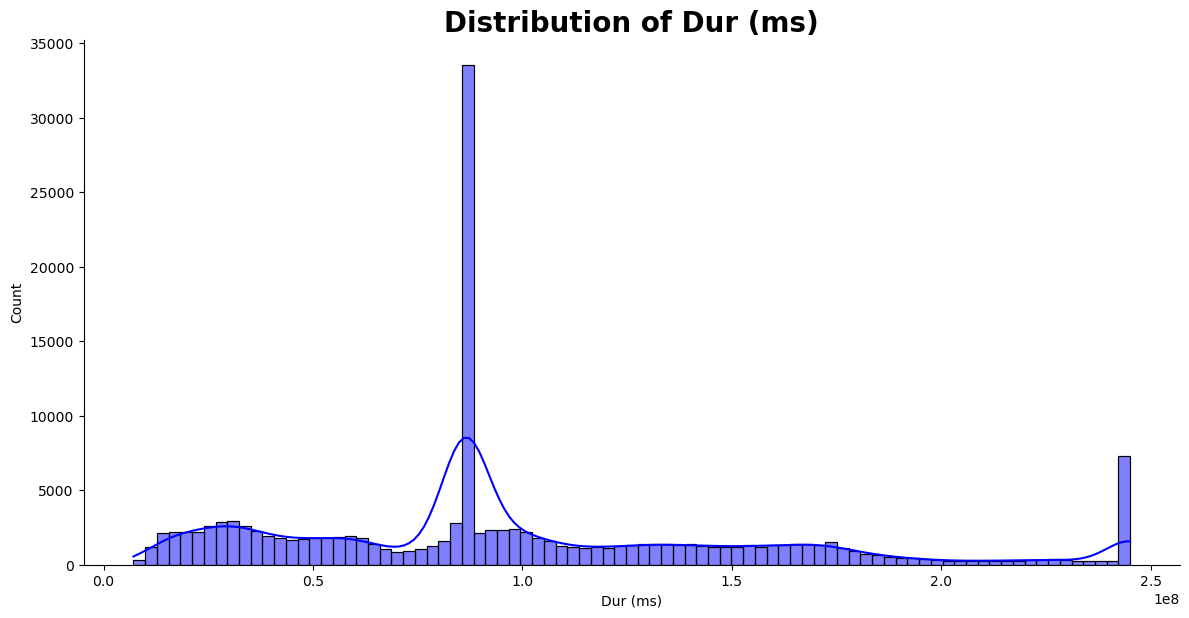

In [45]:
my_plt.hist(df_tele_clean, 'Dur (ms)', 'blue')

In [46]:
#Youtube Data Volume

df_tele_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468870e+05
mean,2.264198e+07
std,9.244659e+06
min,1.296550e+05
25%,1.599692e+07
50%,2.266341e+07
75%,2.929351e+07
max,4.519008e+07


In [47]:
#Netflix Data Volume
df_tele_clean[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.468870e+05
mean,2.262923e+07
std,9.259113e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928806e+07
max,4.519815e+07


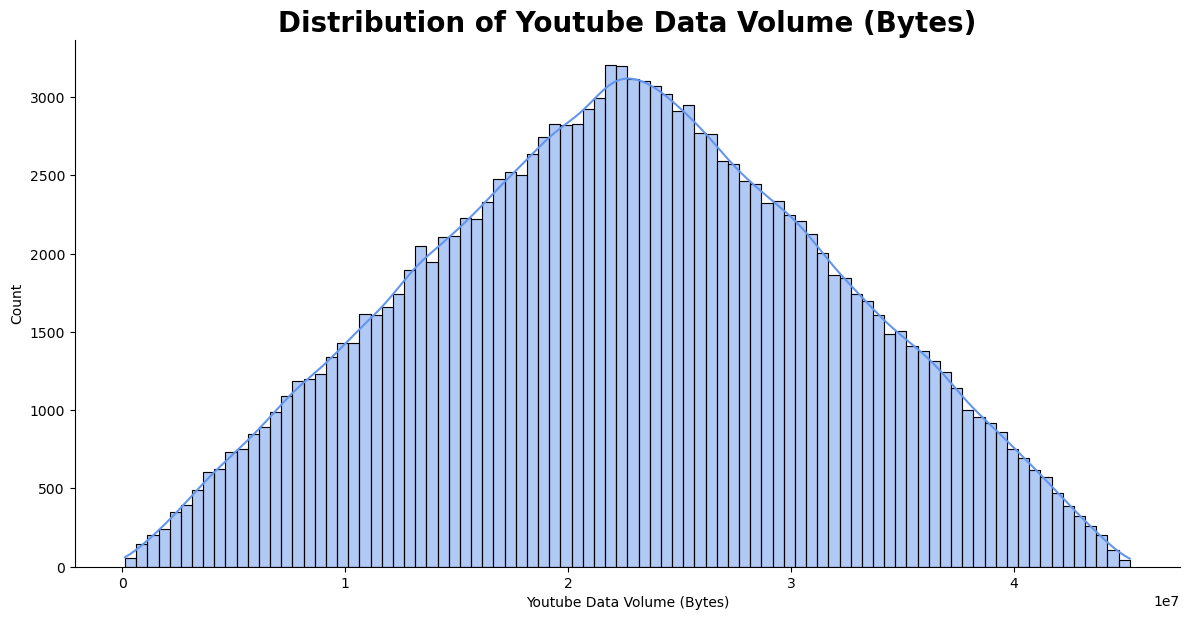

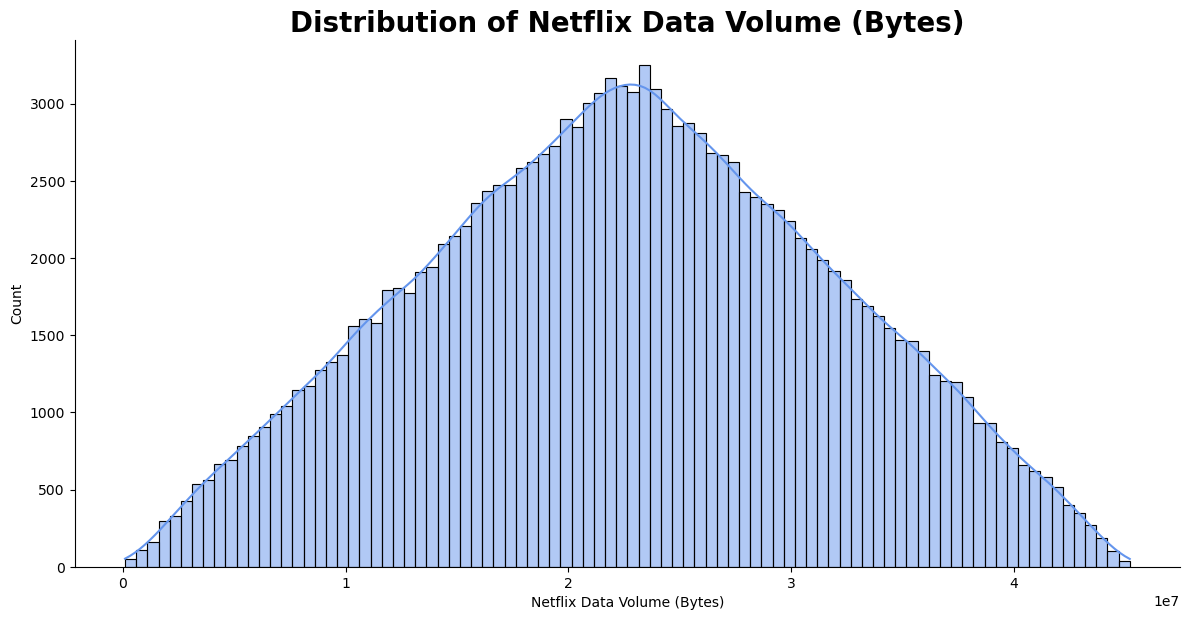

In [48]:
my_plt.hist(df_tele_clean, 'Youtube Data Volume (Bytes)')
my_plt.hist(df_tele_clean, 'Netflix Data Volume (Bytes)')



In [49]:
df_tele_clean[['Gaming Data Volume (Bytes)']].describe()


,Gaming Data Volume (Bytes)
count,1.468870e+05
mean,4.303526e+08
std,2.440925e+08
min,3.063580e+05
25%,2.186904e+08
50%,4.316603e+08
75%,6.415752e+08
max,8.592028e+08


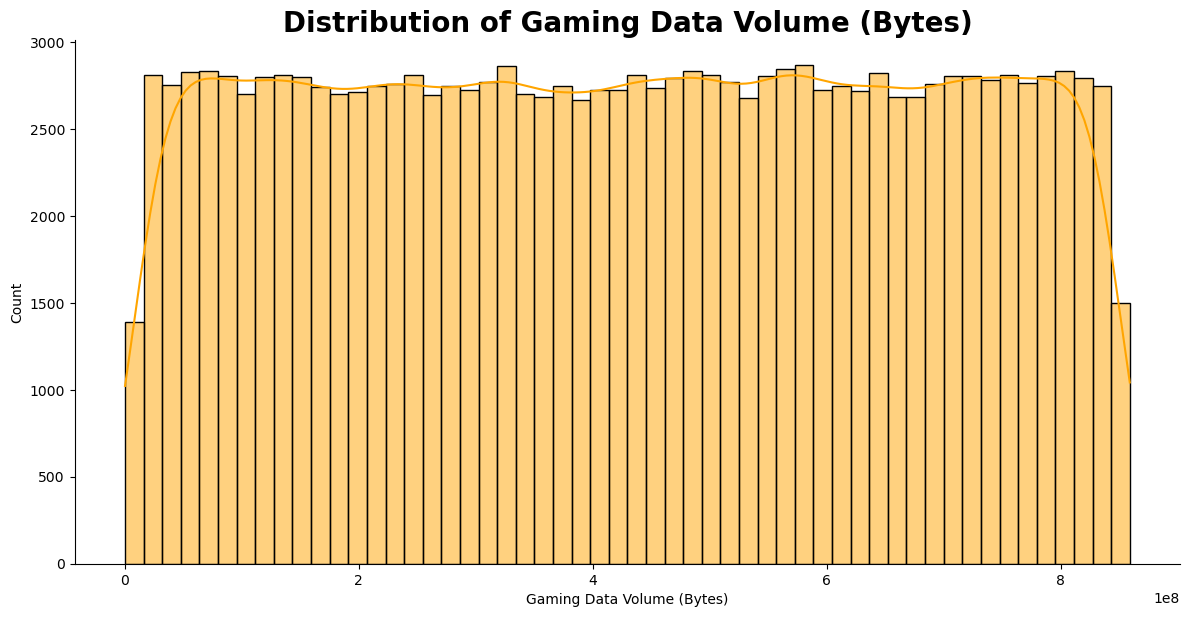

In [50]:
my_plt.hist(df_tele_clean, 'Gaming Data Volume (Bytes)', 'orange')


In [51]:
#Email Data Volume
df_tele_clean[['Email Data Volume (Bytes)']].describe()


,Email Data Volume (Bytes)
count,1.468870e+05
mean,2.259087e+06
std,1.071133e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263890e+06
75%,3.159616e+06
max,4.518036e+06


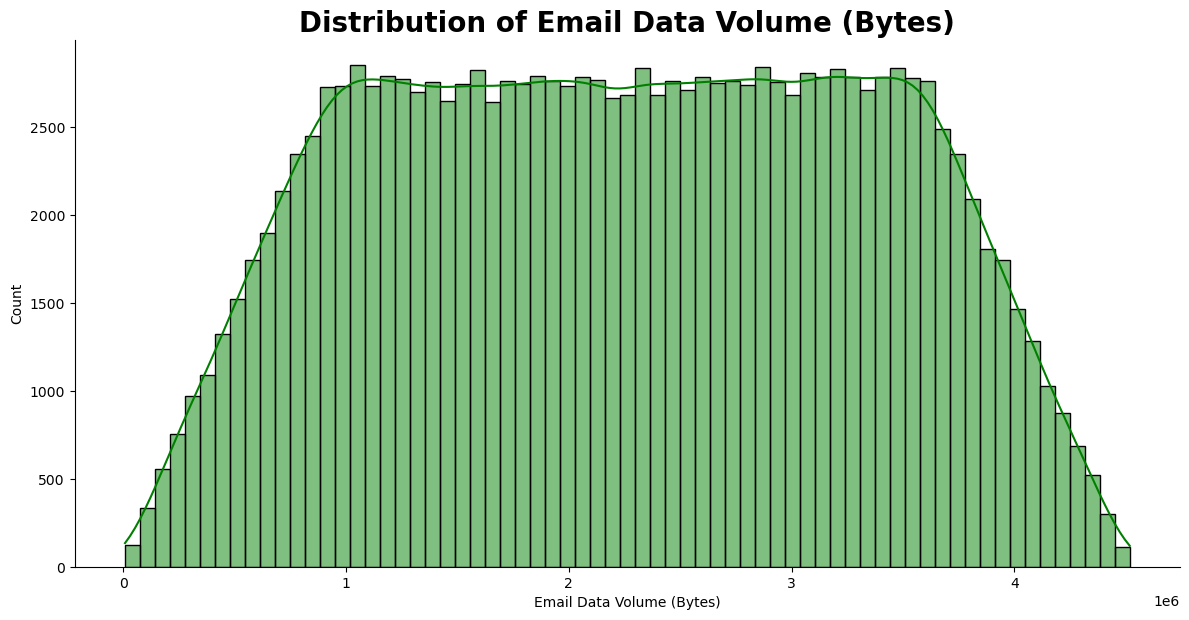

In [52]:
my_plt.hist(df_tele_clean, 'Email Data Volume (Bytes)', 'green')


In [53]:
#Google Data Volume
df_tele_clean[['Google Data Volume (Bytes)']].describe()


,Google Data Volume (Bytes)
count,1.468870e+05
mean,7.807976e+06
std,3.517132e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815531e+06
75%,1.068314e+07
max,1.552878e+07


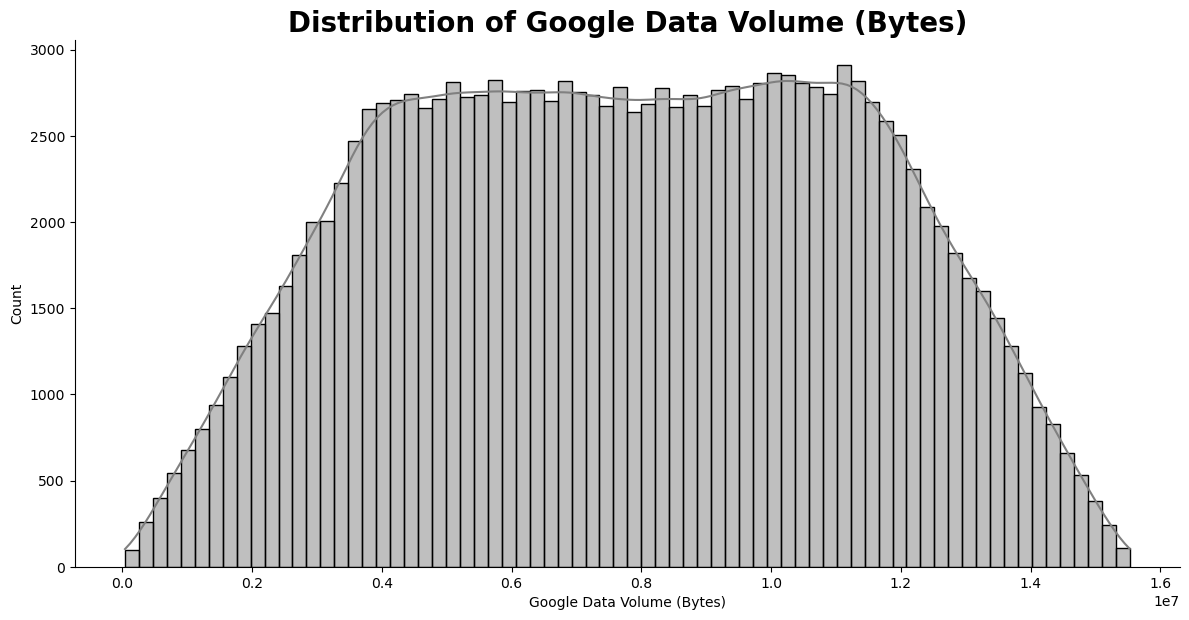

In [54]:
my_plt.hist(df_tele_clean, 'Google Data Volume (Bytes)', 'grey')


In [55]:
#Social Media Data Volume
df_tele_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468870e+05
mean,1.827736e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


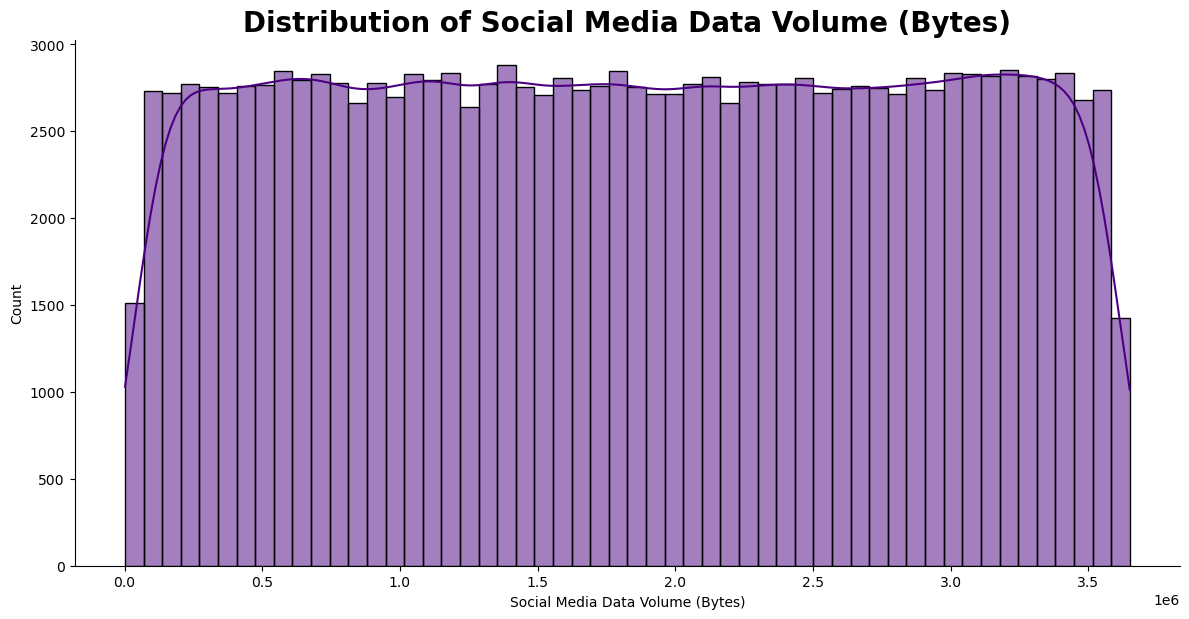

In [56]:
my_plt.hist(df_tele_clean, 'Social Media Data Volume (Bytes)', 'indigo')


In [57]:
#Other Data Volume
df_tele_clean[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.468870e+05
mean,4.292669e+08
std,2.432060e+08
min,1.490450e+05
25%,2.184772e+08
50%,4.297978e+08
75%,6.396625e+08
max,8.595209e+08


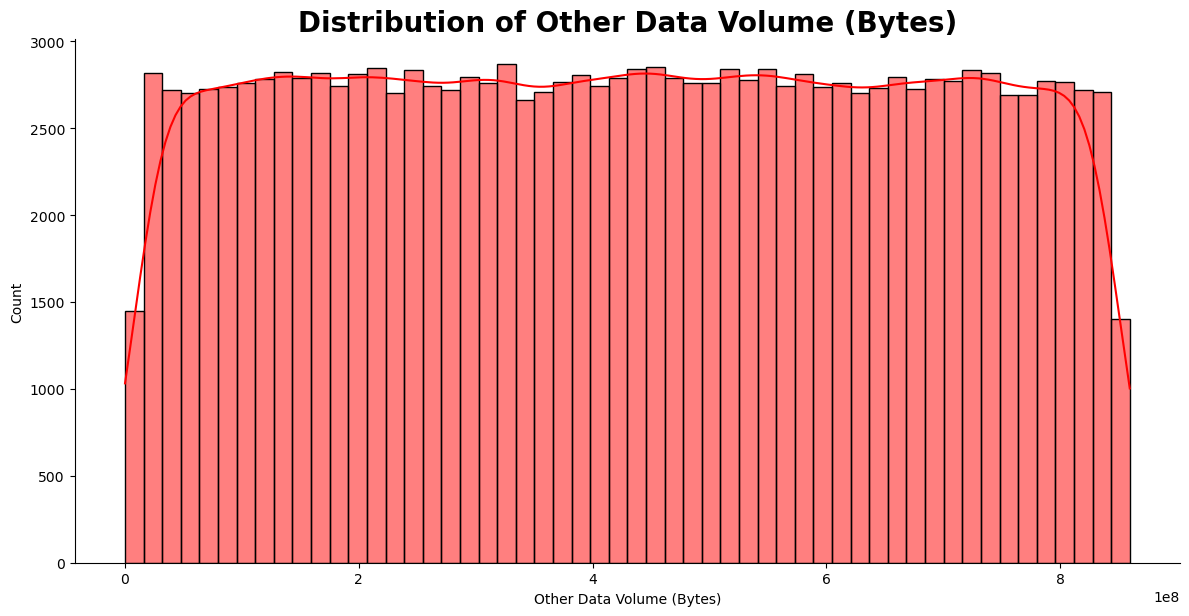

In [58]:
my_plt.hist(df_tele_clean, 'Other Data Volume (Bytes)', 'red')


In [59]:
#Total Volume
df_tele_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468870e+05
mean,4.957815e+08
std,2.444434e+08
min,2.895611e+07
25%,2.844777e+08
50%,4.969362e+08
75%,7.066379e+08
max,9.536316e+08


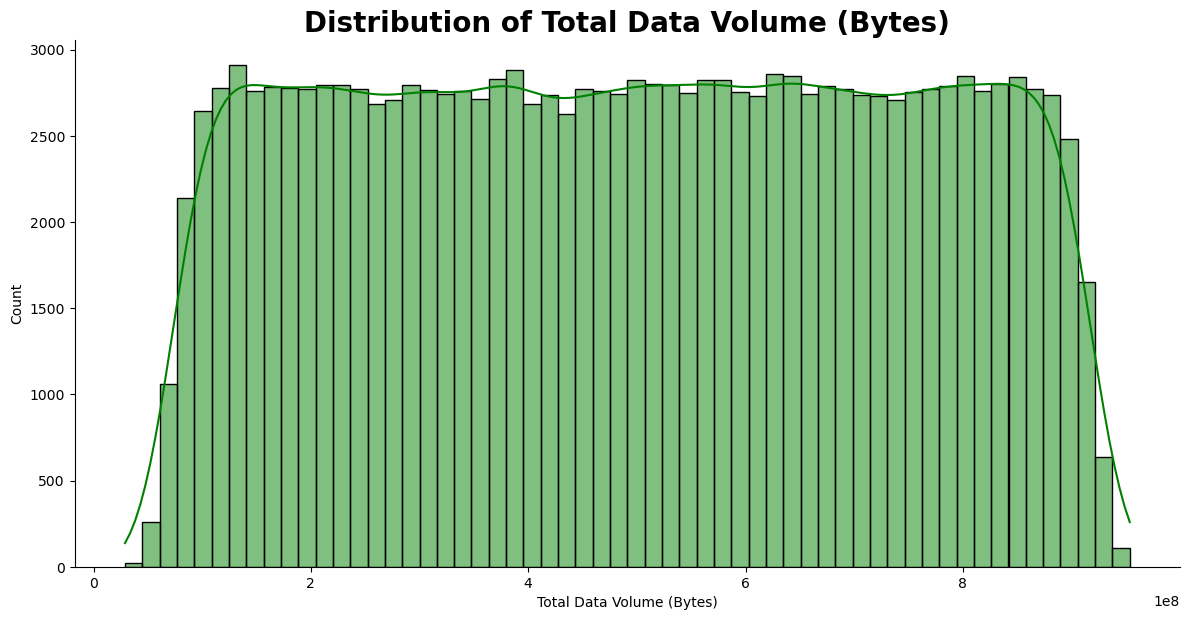

In [60]:
my_plt.hist(df_tele_clean, 'Total Data Volume (Bytes)', 'green')


Bivariate analysis

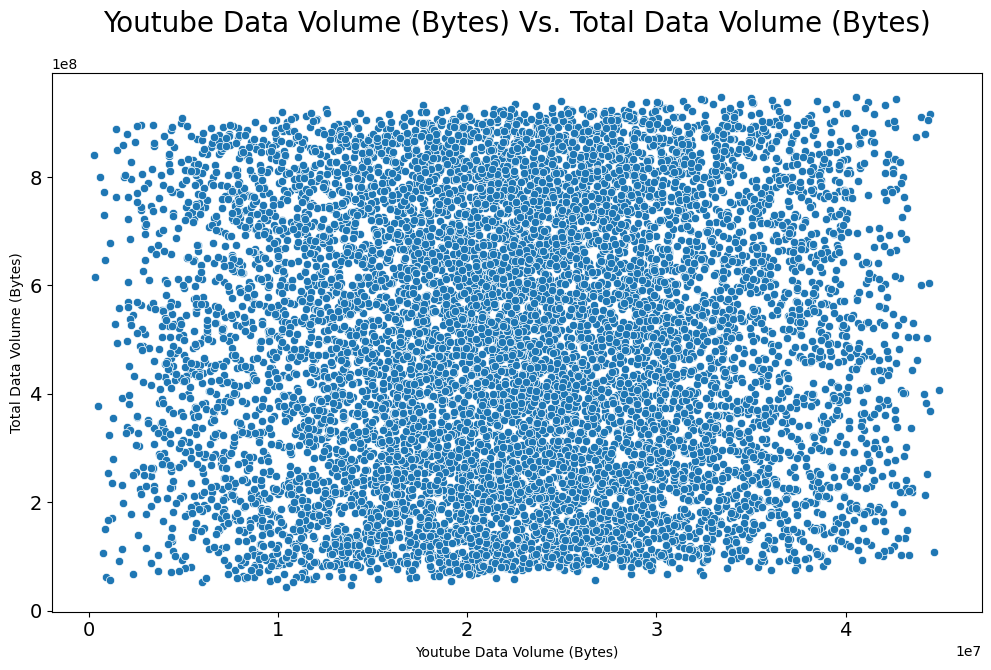

In [61]:
#Youtube Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')


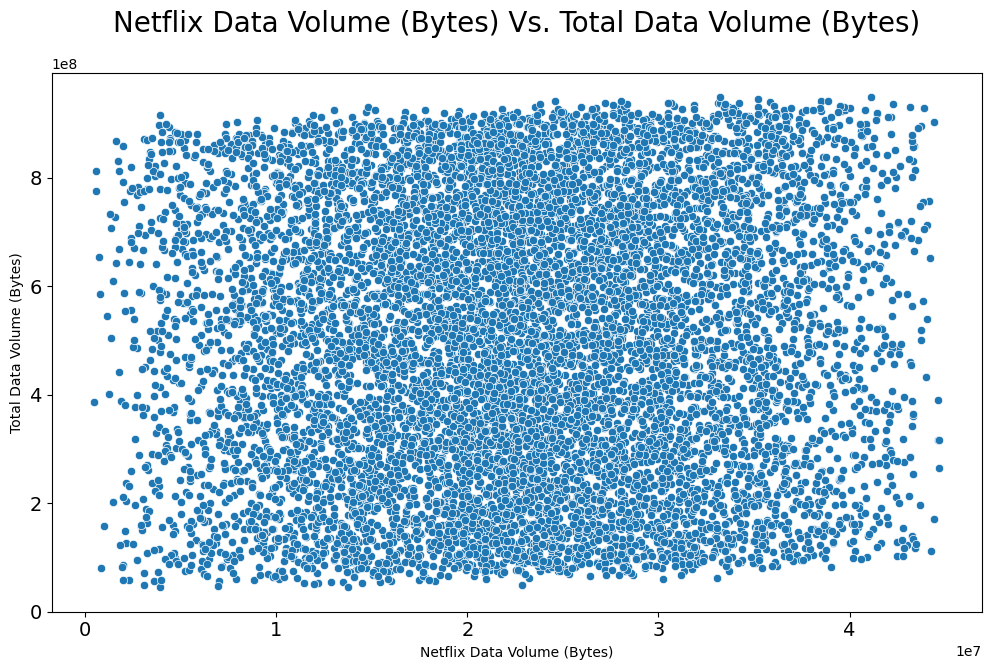

In [62]:
#Netflix Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

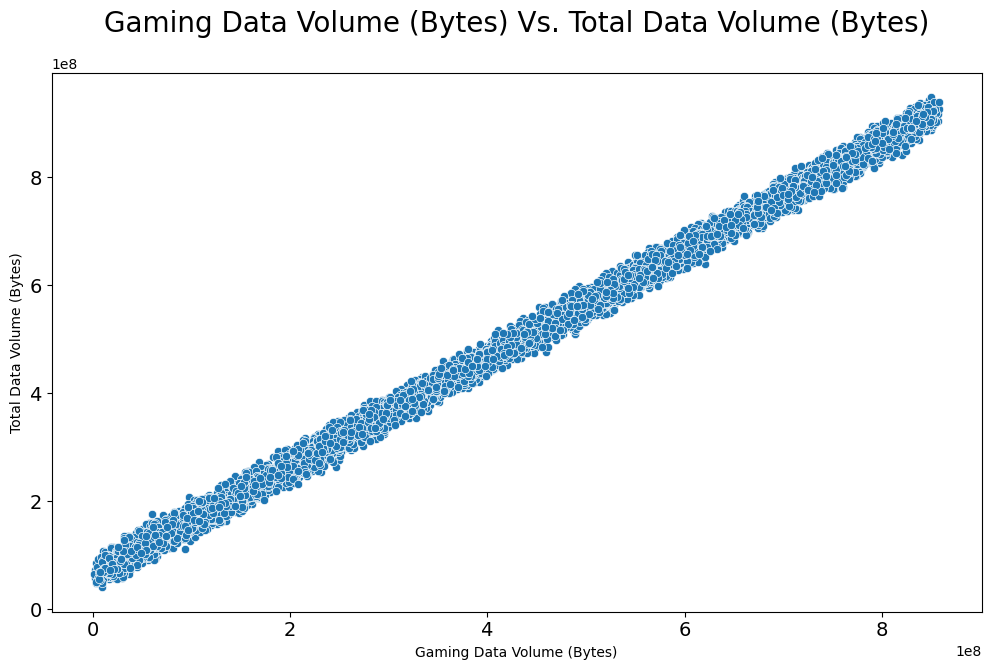

In [63]:
#Gaming Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

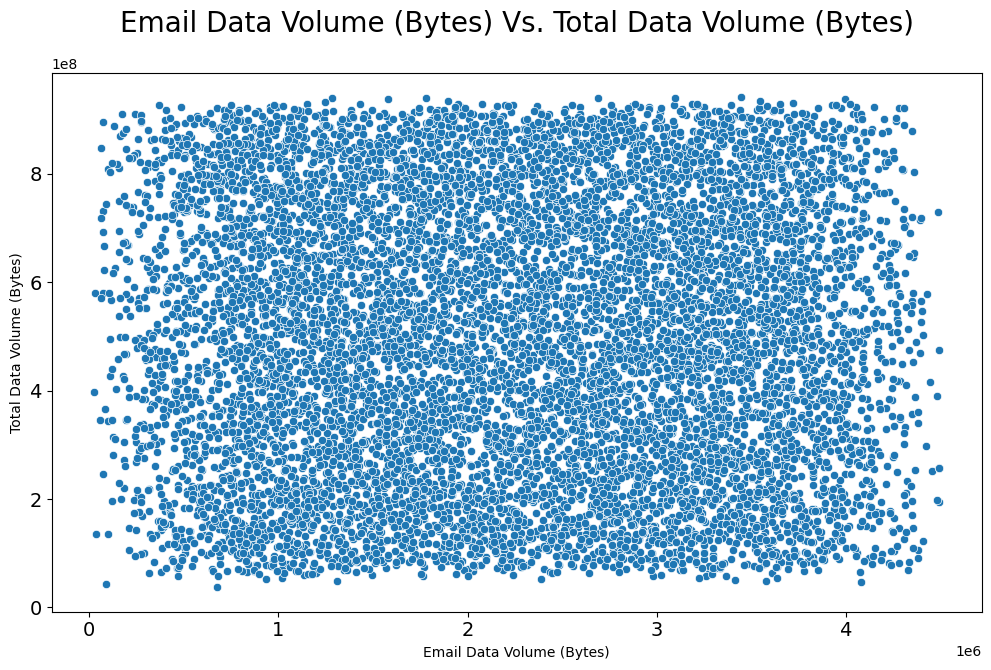

In [64]:
#Email Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

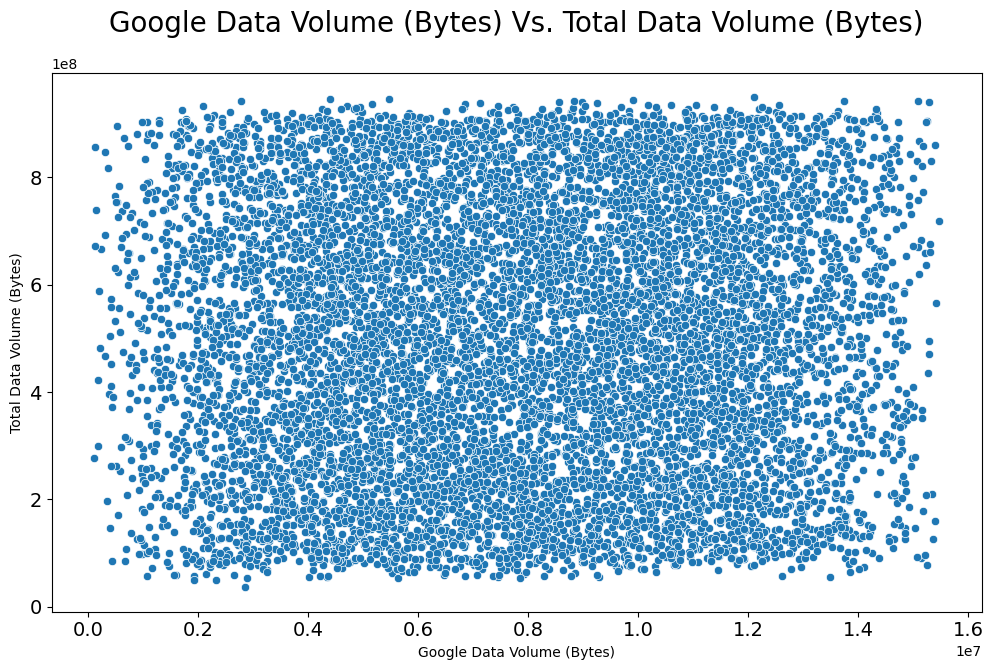

In [65]:
#Google Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

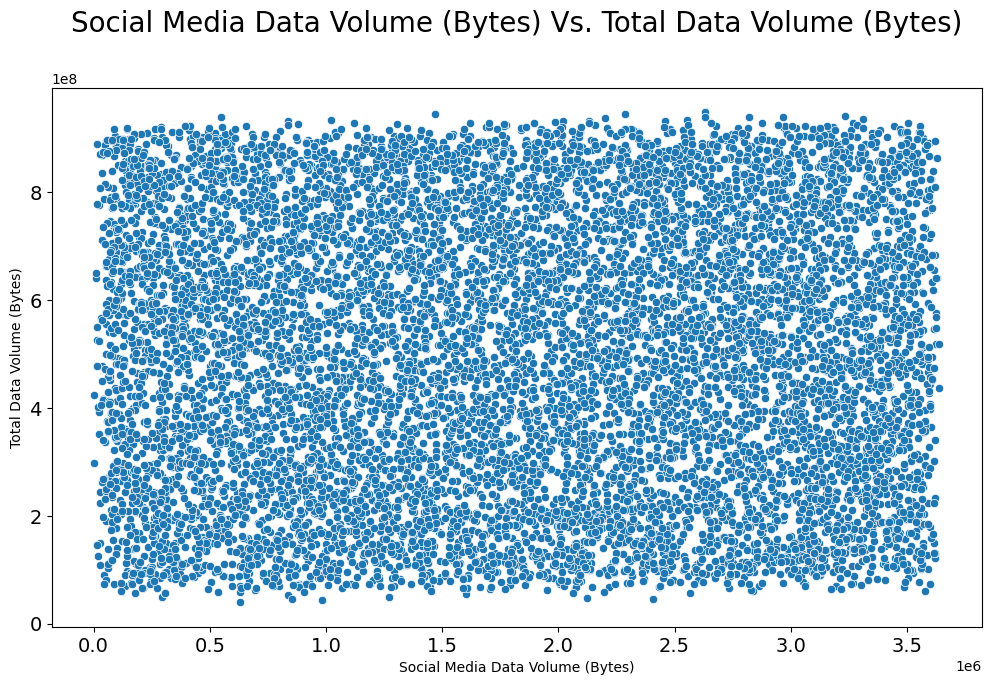

In [66]:
#Social Media Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

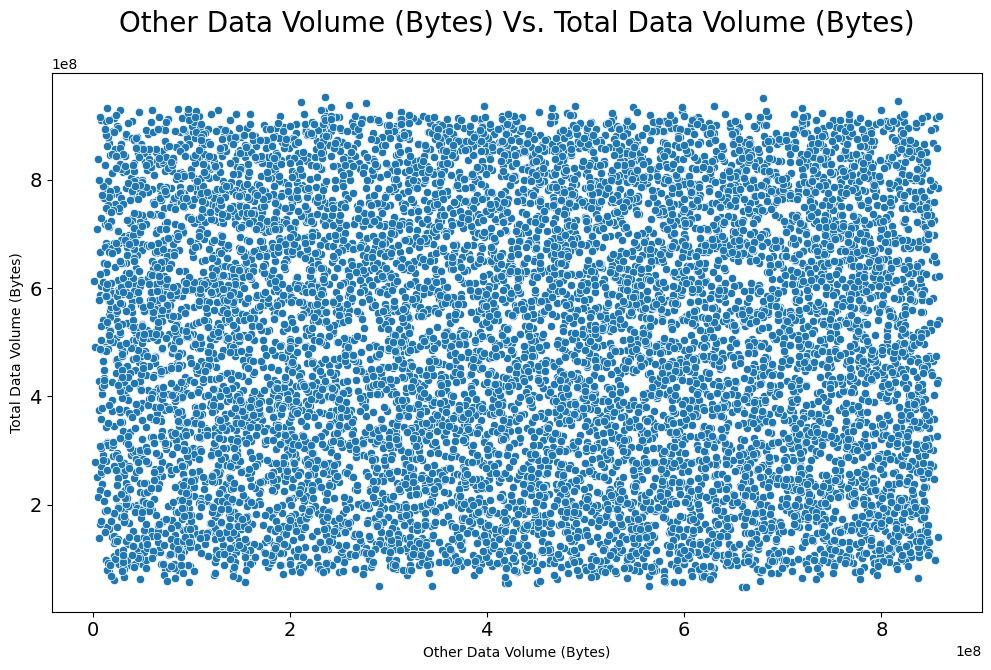

In [67]:

#Other Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)')

Correlation Analysis

In [68]:
df_corr = df_tele_clean[[
    'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']
].corr()
df_corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


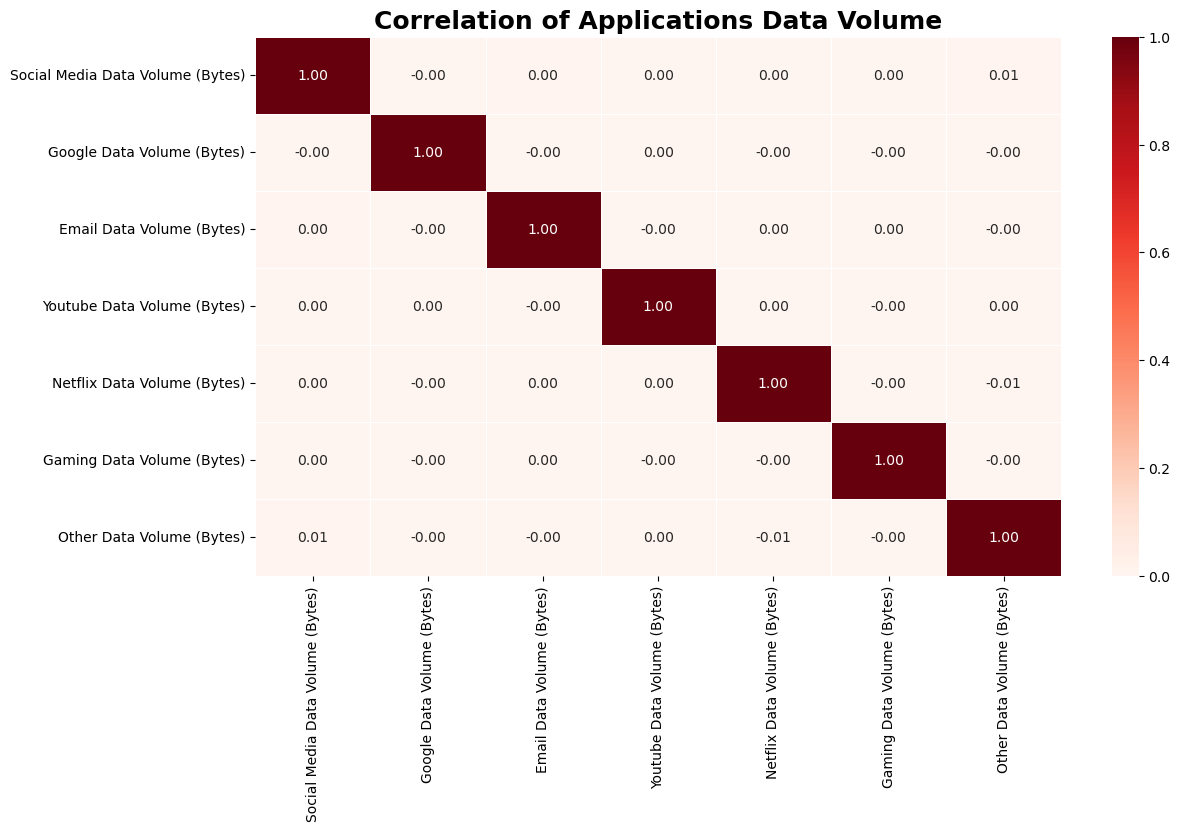

In [69]:
my_plt.heatmap(df_corr, "Correlation of Applications Data Volume")
#We can conclude that no correlation exist among the data usage applications

Handset Analysis

In [70]:
#Top 10 Handset types
df_tele_clean['Handset Type'].value_counts().head(10)


Handset Type
Huawei B528S-23A                19373
Apple iPhone 6S (A1688)          9369
Apple iPhone 6 (A1586)           8967
undefined                        8820
Apple iPhone 7 (A1778)           6240
Apple iPhone Se (A1723)          5150
Apple iPhone 8 (A1905)           4961
Apple iPhone Xr (A2105)          4542
Samsung Galaxy S8 (Sm-G950F)     4404
Apple iPhone X (A1901)           3788
Name: count, dtype: int64

In [71]:
#Handset Manufacturers
df_top_3_manfacturers = df_tele_clean[['Handset Manufacturer']].value_counts().head(3)
df_top_3_manfacturers

Handset Manufacturer
Apple                   59069
Samsung                 39902
Huawei                  33754
Name: count, dtype: int64

<Axes: title={'center': 'Top Handset Manufacturer'}, ylabel='count'>

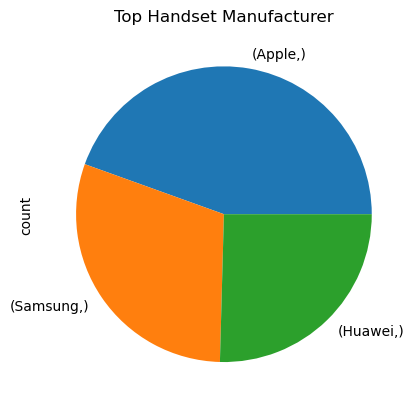

In [72]:
df_tele_clean[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")

Top 5 Handsets of the top 3 Handset Manufacturers


In [73]:
df_top_3_manf = df_tele_clean['Handset Manufacturer'].value_counts().head(3)

#Top 5 handsets per top 3 handset manufacturer
df_top_3_manf = df_tele_clean[df_tele_clean["Handset Manufacturer"].isin(df_top_3_manf.index.tolist())]
top_handsets = df_top_3_manf['Handset Type'].groupby(df_tele_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9369
                      Apple iPhone 6 (A1586)             8967
                      Apple iPhone 7 (A1778)             6240
                      Apple iPhone Se (A1723)            5150
                      Apple iPhone 8 (A1905)             4961
Huawei                Huawei B528S-23A                  19373
                      Huawei E5180                       2062
                      Huawei P20 Lite Huawei Nova 3E     2000
                      Huawei P20                         1471
                      Huawei Y6 2018                      984
Samsung               Samsung Galaxy S8 (Sm-G950F)       4404
                      Samsung Galaxy A5 Sm-A520F         3673
                      Samsung Galaxy J5 (Sm-J530)        3664
                      Samsung Galaxy J3 (Sm-J330)        3431
                      Samsung Galaxy S7 (Sm-G930X)       3106
Name: Handset Typ

Number of xDR sessions of per user


In [74]:
number_of_xdr = df_tele_clean.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
13379,33626320676,18
13035,33625779332,17
6353,33614892860,17
36666,33659725664,16
75561,33675877202,15
...,...,...
40613,33660669493,1
40612,33660669025,1
40610,33660668320,1
40609,33660668134,1


Average session duration per user

In [75]:

session_duration_per_user = df_tele_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
337000037000919,245108160.5
33762185850,245108160.5
33762190964,245108160.5
33667099979,245108160.5
33762199147,245108160.5
33667078134,245108160.5
33667077911,245108160.5
33762213743,245108160.5
33646337581,245108160.5


Total Data Volume Analysis

In [76]:

df_tele_clean['Total UL (Bytes)'] = df_tele_clean['Total UL (Bytes)'].astype("int64")
df_tele_clean['Total DL (Bytes)'] = df_tele_clean['Total DL (Bytes)'].astype("int64")
df_tele_clean['Total Data Volume (Bytes)'] = df_tele_clean['Total Data Volume (Bytes)'].astype("int64")
total_data = df_tele_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(105716, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001,8156743493,8846226494
33760536639,703478581,7811295382,8514773963
33625779332,729577380,7770043342,8499620722
33626320676,669650721,7301516540,7971167261
33675877202,581568792,7309541816,7891110608
...,...,...,...
33675475328,23503704,14518653,38022357
33782507973,26623910,11305331,37929241
33666684512,24544016,9455608,33999624


Total data volumne of each application per user


In [77]:
apps_total = df_tele_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8846226494
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8514773963
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8499620722
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7971167261
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7891110608
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7705862783
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7308500938
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7132370514
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6872336637


Variable Transformation


In [78]:
# creating deciles based on the 'Dur (ms)' (duration in milliseconds) column
df_tele_decile = df_tele_clean.copy()
df_tele_decile['Decile'] = pd.qcut(df_tele_decile['Dur (ms)'], 10, labels=False)
# aggregate the sum of 'Dur (ms)' and 'Total Data Volume (Bytes)' for each decile
df_tele_decile =  df_tele_decile.groupby(['Decile']).agg({'Dur (ms)': "sum","Total Data Volume (Bytes)": "sum"}).sort_values(by='Dur (ms)',ascending=False)
df_tele_decile

,Dur (ms),Total Data Volume (Bytes)
Decile,,
9,3.326176e+12,7312404627319
8,2.422762e+12,7307113556483
7,1.954808e+12,7253455356815
6,1.516391e+12,7287448713314
5,1.274487e+12,7189660424120
4,1.272758e+12,7263918767986
3,1.245171e+12,7315562380058
2,8.682335e+11,7326155383894
1,5.408054e+11,7281955728553


Dimensionality reduction using Principal Component Analysis (PCA)

In [79]:
# Separating Numerical Columns
df_float = df_tele_clean.select_dtypes(include=[float])
df_int = df_tele_clean.select_dtypes(include=[int])

# Combining Numerical Columns into a List:

df = df_tele_clean
number_array = df_float.columns.to_list() + df_int.columns.to_list()
number_array

# Standardizing Features:
# features is assigned the list of column names (number_array).
features = number_array
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [80]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 20 principal components
number = 20
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#The resulting DataFrame principal Df contains the principal components, 
# and each column corresponds to one of the 20 principal components.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.428767,1.215480,-1.037540,1.290264,1.661417,-0.620411,1.690650,1.334947,-0.046042,-0.505899,0.720072,-0.833598,-1.197410,-0.269613,0.142626,0.174466,0.507497,0.465630,-0.402683,2.322085
1,-2.141872,-1.672715,2.978311,-0.895322,-0.654961,-2.175332,-0.291949,0.059646,-0.126853,1.343229,0.726865,-1.161116,0.123474,0.332056,-1.630629,1.041154,-0.452719,-1.536635,-0.591124,0.084101
2,-2.228198,1.534309,-0.075799,-0.293355,0.059718,1.652843,1.007258,0.731309,-0.358197,2.755347,0.566085,-1.097604,0.673794,-0.770595,-0.370622,-0.064316,0.329794,-0.341314,-0.045930,-0.963980
3,-2.356595,-3.186584,0.537098,-1.981008,-2.517100,1.291546,1.516699,-0.411747,-0.180235,0.432449,0.674483,-1.136632,0.573552,-0.191762,0.489807,-0.338785,-0.853396,-1.564838,0.169966,0.752892
4,-2.264063,-0.879253,0.186863,-1.023074,-1.506997,-0.035851,1.444856,0.361700,-0.166507,0.863171,0.476007,-1.034305,-1.517823,0.044700,-1.677656,-1.628411,0.841599,-1.041029,-0.336460,-0.010761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.909167,1.229476,2.113836,2.373489,-0.891346,0.733563,-0.991501,-1.693194,2.058490,-0.536816,-1.556405,2.288290,-0.559377,-0.281572,-0.280854,-0.786710,-0.034184,-0.188821,1.625473,-0.471825
146883,-1.769564,3.147828,0.884072,-3.091730,-1.998075,-0.881267,0.409950,0.165664,2.329489,0.306483,-1.191582,1.088048,0.474344,-0.825532,0.430418,0.129537,-1.436994,-0.479502,2.086704,-0.396958
146884,-1.766598,-1.365760,1.800674,1.721931,0.545570,1.549846,-1.444869,-0.304314,2.545819,2.233639,-0.846150,1.108631,1.049772,-0.544473,-0.505975,1.742403,-0.479691,-1.460330,0.082066,-0.172230
146885,-1.710881,-3.413469,3.142191,-1.885035,-2.006454,-0.246046,1.180332,-0.827042,2.455486,0.713297,-1.046179,1.030238,1.647976,-1.260467,-0.031823,-1.044549,1.614382,-1.055144,-0.277939,1.242040


In [81]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()


0.8510164760987365

The above result shows Approximately 85.1% of the total variance in the original data is explained by the first 20 principal components.

In [82]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 30 principal components
number = 30
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.428767,1.215481,-1.037539,1.290270,1.661422,-0.620406,1.690642,1.334950,-0.046040,-0.505899,...,-0.433041,0.599714,-0.323829,-1.390983,2.355393,-0.700692,0.200612,0.268153,0.037027,-0.075449
1,-2.141872,-1.672715,2.978311,-0.895325,-0.654962,-2.175332,-0.291948,0.059645,-0.126856,1.343230,...,0.129521,0.411172,0.901106,-0.934034,2.651138,-0.814822,0.159176,0.038047,0.079422,0.003647
2,-2.228198,1.534309,-0.075800,-0.293359,0.059716,1.652840,1.007262,0.731307,-0.358201,2.755348,...,0.894631,0.170933,1.608716,-0.991504,2.700819,-0.796895,0.214760,0.091129,0.108206,0.024095
3,-2.356595,-3.186584,0.537097,-1.981010,-2.517101,1.291545,1.516701,-0.411748,-0.180233,0.432448,...,0.728576,0.559062,-0.853768,-0.845599,2.657395,-0.755320,0.223800,0.152471,0.198296,0.016556
4,-2.264063,-0.879253,0.186863,-1.023077,-1.506999,-0.035853,1.444858,0.361699,-0.166509,0.863171,...,0.565830,0.326509,0.993585,-0.917614,2.621332,-0.781797,0.201595,0.102399,0.127153,0.018623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.909167,1.229476,2.113833,2.373481,-0.891354,0.733555,-0.991490,-1.693199,2.058487,-0.536815,...,0.177928,0.253977,-0.689850,0.260934,-1.640017,0.468383,-0.349952,-0.074840,-0.086381,0.095883
146883,-1.769564,3.147827,0.884069,-3.091740,-1.998084,-0.881276,0.409964,0.165658,2.329485,0.306484,...,0.765765,1.763562,1.431537,0.066745,-1.296610,0.148634,-0.497438,-0.033782,-0.068550,0.123762
146884,-1.766598,-1.365761,1.800671,1.721922,0.545560,1.549836,-1.444855,-0.304320,2.545815,2.233640,...,0.463561,1.714520,1.073018,0.221904,-0.737583,0.063520,-0.363419,0.192969,0.052246,0.118889
146885,-1.710881,-3.413470,3.142188,-1.885045,-2.006463,-0.246056,1.180346,-0.827048,2.455483,0.713298,...,0.910992,1.594241,0.474886,0.241694,-0.833563,0.075237,-0.427344,0.094387,0.001761,0.123136


In [83]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()

0.9917317338623941

Approximately 99.17% of the total variance in the original data is explained by the first 30 principal components.

In [84]:
number = 40
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 40

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.428767,1.215481,-1.037539,1.290270,1.661422,-0.620406,1.690642,1.334950,-0.046040,-0.505899,...,-0.007211,-0.018398,0.001447,0.018424,-0.006647,0.012317,-0.000233,-3.011114e-14,3.935935e-16,6.134403e-16
1,-2.141872,-1.672715,2.978311,-0.895325,-0.654962,-2.175332,-0.291948,0.059645,-0.126856,1.343230,...,0.016229,-0.024597,-0.310954,0.044129,0.215254,0.050155,0.000371,1.413515e-15,2.536112e-15,2.067464e-16
2,-2.228198,1.534309,-0.075800,-0.293359,0.059716,1.652840,1.007262,0.731307,-0.358201,2.755348,...,0.022942,-0.018630,-0.239381,0.038291,0.137351,0.027507,-0.000711,-1.281138e-15,2.975325e-16,1.110186e-15
3,-2.356595,-3.186584,0.537097,-1.981010,-2.517101,1.291545,1.516701,-0.411748,-0.180233,0.432448,...,-0.041973,0.006074,0.042026,0.014508,0.046141,-0.010691,0.000222,2.938459e-15,-5.607651e-16,-2.343804e-15
4,-2.264063,-0.879253,0.186863,-1.023077,-1.506999,-0.035853,1.444858,0.361699,-0.166509,0.863171,...,0.010492,-0.013521,-0.187507,0.034181,0.116881,0.034190,-0.000159,-3.433811e-16,-5.048124e-16,-3.029328e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146882,-1.909167,1.229476,2.113833,2.373481,-0.891354,0.733555,-0.991490,-1.693199,2.058487,-0.536815,...,0.003609,-0.006100,-0.051819,-0.037499,-0.007278,-0.001922,0.000842,9.123770e-16,-1.477674e-16,3.466757e-16
146883,-1.769564,3.147827,0.884069,-3.091740,-1.998084,-0.881276,0.409964,0.165658,2.329485,0.306484,...,0.013347,0.001376,-0.032414,-0.038311,-0.010151,-0.008237,0.000358,-1.917234e-15,3.315666e-16,1.669760e-16
146884,-1.766598,-1.365761,1.800671,1.721922,0.545560,1.549836,-1.444855,-0.304320,2.545815,2.233640,...,0.014927,0.015814,-0.009924,-0.047458,-0.006755,-0.005019,0.000048,-7.670357e-16,5.254507e-17,-2.883134e-16
146885,-1.710881,-3.413470,3.142188,-1.885045,-2.006463,-0.246056,1.180346,-0.827048,2.455483,0.713298,...,0.006284,0.018148,-0.026656,-0.044338,0.013711,-0.009696,0.000714,-1.058796e-15,4.231842e-17,-3.502858e-17


The "explained_variance_ratio_" attribute in PCA (Principal Component Analysis) provides the variance explained by each of the principal components. If you run pca.explained_variance_ratio_ on your PCA model, it will return an array where each element represents the proportion of the dataset's variance explained by the corresponding principal component.

In [85]:
pca.explained_variance_ratio_


array([1.98712188e-01, 8.69315418e-02, 5.54334205e-02, 4.38653977e-02,
       4.37594746e-02, 4.34996242e-02, 4.32115080e-02, 4.29859945e-02,
       3.26784616e-02, 3.16566436e-02, 2.61584443e-02, 2.52045598e-02,
       2.43998270e-02, 2.20879891e-02, 2.19300386e-02, 2.18040386e-02,
       2.17714115e-02, 2.17495404e-02, 2.16468776e-02, 2.15295329e-02,
       2.13431303e-02, 1.96266456e-02, 1.90663086e-02, 1.83868420e-02,
       1.56423911e-02, 1.27760521e-02, 1.16695330e-02, 9.74415843e-03,
       8.38944948e-03, 4.07070898e-03, 2.79933110e-03, 2.36520751e-03,
       1.39698309e-03, 7.99893031e-04, 5.31849435e-04, 3.74427810e-04,
       5.74163718e-07, 1.99546744e-31, 5.68502138e-32, 5.61803255e-32])

In [86]:
pca.explained_variance_ratio_.sum()

1.0

This means that all the variance in the original dataset is explained by the retained principal components 40. 